# Mueller Calculus Documentation

**Scott Prahl**

Visualization and interpretation sections need to be changed from Jones to Mueller


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pypolar.fresnel as fresnel
import pypolar.jones as jones
import pypolar.mueller as mueller
import pypolar.visualization as vis

# To solve "No module named 'pypolar.mueller'", run on the command-line (or Anaconda prompt)
#      pip install --upgrade pypolar

# Basic Polarization Fields

In [2]:
light = mueller.stokes_horizontal()
print("Stokes vector for horizontally-polarized light")
print(light)

light = mueller.stokes_linear(0)
print("Stokes vector for 0° linearly polarized light")
print(light)

light = mueller.stokes_vertical()
print("Stokes vector for vertically-polarized light")
print(light)

light = mueller.stokes_linear(np.pi/2)
print("Stokes vector for 90° linearly polarized light")
print(light)

light = mueller.stokes_linear(np.radians(45))
print("Stokes vector for 45° linearly polarized light")
print(light)

light = mueller.stokes_right_circular()
print("Stokes vector for right circularly polarized light")
print(light)

light = mueller.stokes_left_circular()
print("Stokes vector for left circularly polarized light")
print(light)

Stokes vector for horizontally-polarized light
[1 1 0 0]
Stokes vector for 0° linearly polarized light
[1. 1. 0. 0.]
Stokes vector for vertically-polarized light
[ 1 -1  0  0]
Stokes vector for 90° linearly polarized light
[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16  0.0000000e+00]
Stokes vector for 45° linearly polarized light
[1.000000e+00 6.123234e-17 1.000000e+00 0.000000e+00]
Stokes vector for right circularly polarized light
[1 0 0 1]
Stokes vector for left circularly polarized light
[ 1  0  0 -1]


# Linear Polarizers

In [3]:
for theta in [0,45,90,-45]:
    print('Mueller matrix for perfect linear polarizer at angle theta=%.1f°' % theta)
    L = mueller.op_linear_polarizer(np.radians(theta))
    print(L, "\n")

Mueller matrix for perfect linear polarizer at angle theta=0.0°
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]] 

Mueller matrix for perfect linear polarizer at angle theta=45.0°
[[5.00000000e-01 3.06161700e-17 5.00000000e-01 0.00000000e+00]
 [3.06161700e-17 1.87469973e-33 3.06161700e-17 0.00000000e+00]
 [5.00000000e-01 3.06161700e-17 5.00000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]] 

Mueller matrix for perfect linear polarizer at angle theta=90.0°
[[ 5.00000000e-01 -5.00000000e-01  6.12323400e-17  0.00000000e+00]
 [-5.00000000e-01  5.00000000e-01 -6.12323400e-17  0.00000000e+00]
 [ 6.12323400e-17 -6.12323400e-17  7.49879891e-33  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]] 

Mueller matrix for perfect linear polarizer at angle theta=-45.0°
[[ 5.00000000e-01  3.06161700e-17 -5.00000000e-01  0.00000000e+00]
 [ 3.06161700e-17  1.87469973e-33 -3.06161700e-17  0.00000000e+00]
 

# Quarter-Wave Plates

In [4]:
for theta in [0, 90, 45, -45]:
    print('Mueller matrix for quarter-wave plate with fast axis at angle theta=',theta)
    L = mueller.op_quarter_wave_plate(np.radians(theta))
    print(L,"\nShould be the same as")
    L = mueller.op_retarder(np.radians(theta), np.pi/2)
    print(L,"\n")

Mueller matrix for quarter-wave plate with fast axis at angle theta= 0
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]] 
Should be the same as
[[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00 -0.000000e+00]
 [ 0.000000e+00  0.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00 -1.000000e+00  6.123234e-17]] 

Mueller matrix for quarter-wave plate with fast axis at angle theta= 90
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.22464680e-16 -1.22464680e-16]
 [ 0.00000000e+00 -1.22464680e-16  1.49975978e-32 -1.00000000e+00]
 [ 0.00000000e+00  1.22464680e-16  1.00000000e+00  0.00000000e+00]] 
Should be the same as
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.0000000e+00 -1.2246468e-16 -1.2246468e-16]
 [ 0.0000000e+00 -1.2246468e-16  6.1232340e-17 -1.0000000e+00]
 [ 0.0000000e+00  1.2246468e-16  1.00

# Half-Wave Plates

In [5]:
for theta in [0, 90, 45, -45]:
    print('Mueller matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = mueller.op_half_wave_plate(np.radians(theta))
    print(L,"\nShould be the same as")
    L = mueller.op_retarder(np.radians(theta), np.pi)
    print(L,"\n")


Mueller matrix for half-wave plate with fast axis at angle theta= 0.0
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]] 
Should be the same as
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00 -0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -1.0000000e+00  1.2246468e-16]
 [ 0.0000000e+00  0.0000000e+00 -1.2246468e-16 -1.0000000e+00]] 

Mueller matrix for half-wave plate with fast axis at angle theta= 5156.620156177409
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.0000000e+00 -2.4492936e-16  0.0000000e+00]
 [ 0.0000000e+00 -2.4492936e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.0000000e+00]] 
Should be the same as
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.44929360e-16 -1.49975978e-32]
 [ 0.00000000e+00 -2.44929360e-16 -1.00000000e+00 -1.22464680e-16]
 [ 0.00000000e

# Fresnel Reflection

## Normal incidence

$$
M_R(0) = {(n-1)^2\over(n+1)^2}
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & -1& 0\\
0 & 0 & 0 &-1\\
\end{array}\right]
\qquad\mbox{and}\qquad
M_T(0) = {4n\over(n+1)^2}
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1& 0\\
0 & 0 & 0 &1\\
\end{array}\right]
$$

In [6]:
MR = mueller.op_fresnel_reflection(1.5,0)
print("M_R=")
print(MR)

M_R=
[[ 0.04  0.    0.    0.  ]
 [ 0.    0.04  0.    0.  ]
 [ 0.    0.   -0.04  0.  ]
 [ 0.    0.    0.   -0.04]]


In [7]:
MT = mueller.op_fresnel_transmission(1.5,0)
print("M_T=")
print(MT)

M_T=
[[0.96 0.   0.   0.  ]
 [0.   0.96 0.   0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.   0.   0.96]]


## Brewster's Angle
Brewster's angle for a dielectric material is 
$$
\tan\theta_B = m
$$
and the Mueller matrices are
$$
M_R(\theta_B) = {1\over2}\cos^2 2\theta_B
\left[
\begin{array}{cccc}
1 & 1 & 0 & 0\\
1 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\end{array}\right]
$$

In [8]:
m=1.5
thetaB = np.arctan(m)
MR = mueller.op_fresnel_reflection(1.5,thetaB)
print('M_R=')
print(MR)

print("Matrix at Brewster's angle should be")
const = 0.5*np.cos(2*thetaB)**2
MR=const*np.array([[1,1,0,0],[1,1,0,0],[0,0,0,0],[0,0,0,0]])
print(MR)

M_R=
[[ 0.0739645 -0.0739645  0.         0.       ]
 [-0.0739645  0.0739645  0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.        -0.       ]]
Matrix at Brewster's angle should be
[[0.0739645 0.0739645 0.        0.       ]
 [0.0739645 0.0739645 0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]]


Goldstein gives the following for the Mueller matrix for transmitted light incident at Brewster's angle
$$
M_T(\theta_B) = {1\over2}
\left[
\begin{array}{cccc}
\sin^22\theta_B+1 & \sin^22\theta_B-1 & 0 & 0\\
\sin^22\theta_B-1 & \sin^22\theta_B+1 & 0 & 0\\
0 & 0 & 2\sin2\theta_B& 0\\
0 & 0 & 0 &2\sin2\theta_B\\
\end{array}\right]
$$

In [9]:
m=1.5
thetaB = np.arctan(m)
print("Brewster's angle is %.3f°"%(np.degrees(thetaB)))
print("Rp = %.3f"%fresnel.R_par(m,thetaB))
print("Tp = %.3f"%fresnel.T_par(m,thetaB))
print("Rs = %.3f"%fresnel.R_per(m,thetaB))
print("Ts = %.3f"%fresnel.T_per(m,thetaB))
print()

MT1 = mueller.op_fresnel_transmission(1.5,thetaB)
print('(direct) M_T=')
print(MT1)

JT = jones.op_fresnel_transmission(1.5,thetaB)
MT2 = jones.jones_op_to_mueller_op(JT)
print('(from Jones) M_T=')
print(MT2)

print("At Brewster's angle the matrix should be")
a = 0.5*(np.sin(2*thetaB)**2+1)
b = 0.5*(np.sin(2*thetaB)**2-1)
c = np.sin(2*thetaB)
MT=const*np.array([[a,b,0,0],[b,a,0,0],[0,0,c,0],[0,0,0,c]])
print(MT)
#print(MT1/MT)

Brewster's angle is 56.310°
Rp = 0.000
Tp = 1.000
Rs = 0.148
Ts = 0.852

(direct) M_T=
[[ 0.9260355  -0.0739645   0.          0.        ]
 [-0.0739645   0.9260355   0.          0.        ]
 [ 0.          0.          0.92307692  0.        ]
 [ 0.          0.          0.          0.92307692]]
(from Jones) M_T=
[[0.9260355  0.0739645  0.         0.        ]
 [0.0739645  0.9260355  0.         0.        ]
 [0.         0.         0.92307692 0.        ]
 [0.         0.         0.         0.92307692]]
At Brewster's angle the matrix should be
[[ 0.06849375 -0.00547075  0.          0.        ]
 [-0.00547075  0.06849375  0.          0.        ]
 [ 0.          0.          0.06827492  0.        ]
 [ 0.          0.          0.          0.06827492]]


## 45°
Goldstein 2003 gives
$$
\theta_r = 45^\circ
$$
thus
$$
M_R(\theta_r) = {1-\sin2\theta_r\over(1+\sin2\theta_r)^2}
\left[
\begin{array}{cccc}
1 & \sin2\theta_r & 0 & 0\\
\sin2\theta_r & 1 & 0 & 0\\
0 & 0 & -\cos2\theta_r & 0\\
0 & 0 & 0 & -\cos2\theta_r\\
\end{array}\right]
$$
which may be off by a minus sign in the lower two diagonal elements?

In [10]:
m=1.5
thetai = np.pi/4

MR = mueller.op_fresnel_reflection(1.5,thetai)
print('M_R=')
print(MR)

print("Matrix at 45° angle should be")
thetar = np.arcsin(np.sin(thetai)/m)
const = (1-np.sin(2*thetar))/(1+np.sin(2*thetar))**2
a = np.sin(2*thetar)
b = -np.cos(2*thetar)
MR=const*np.array([[1,a,0,0],[a,1,0,0],[0,0,b,0],[0,0,0,b]])
print(MR)

M_R=
[[ 0.05023991 -0.04177345  0.          0.        ]
 [-0.04177345  0.05023991  0.          0.        ]
 [ 0.          0.         -0.02791106  0.        ]
 [ 0.          0.          0.         -0.02791106]]
Matrix at 45° angle should be
[[ 0.05023991  0.04177345  0.          0.        ]
 [ 0.04177345  0.05023991  0.          0.        ]
 [ 0.          0.         -0.02791106  0.        ]
 [ 0.          0.          0.         -0.02791106]]


# Stokes to Jones Conversion


In [11]:
S = mueller.stokes_horizontal()
print("Stokes vector for horizontally-polarized light")
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_horizontal())

Stokes vector for horizontally-polarized light
[1 1 0 0]
Jones conversion
[1.+0.j 0.+0.j]
Actual Jones vector
[1. 0.]


In [12]:
S = mueller.stokes_vertical()
print("Stokes vector for vertically-polarized light")
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_vertical())

Stokes vector for vertically-polarized light
[ 1 -1  0  0]
Jones conversion
[0. 1.]
Actual Jones vector
[6.123234e-17 1.000000e+00]


In [13]:
angle = 30*np.pi/180
S = mueller.stokes_linear(angle)
print("Stokes vector for linearly-polarized light at %.1f°"%(angle*180/np.pi))
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_linear(angle))

Stokes vector for linearly-polarized light at 30.0°
[1.        0.5       0.8660254 0.       ]
Jones conversion
[0.8660254+0.j 0.5      +0.j]
Actual Jones vector
[0.8660254 0.5      ]


In [14]:
angle = 30*np.pi/180
S = mueller.stokes_right_circular()
print("Stokes vector for right-circular-polarized light")
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_right_circular())

Stokes vector for right-circular-polarized light
[1 0 0 1]
Jones conversion
[0.70710678+0.j         0.        -0.70710678j]
Actual Jones vector
[0.70710678+0.j         0.        -0.70710678j]


# Visualization

<IPython.core.display.Javascript object>


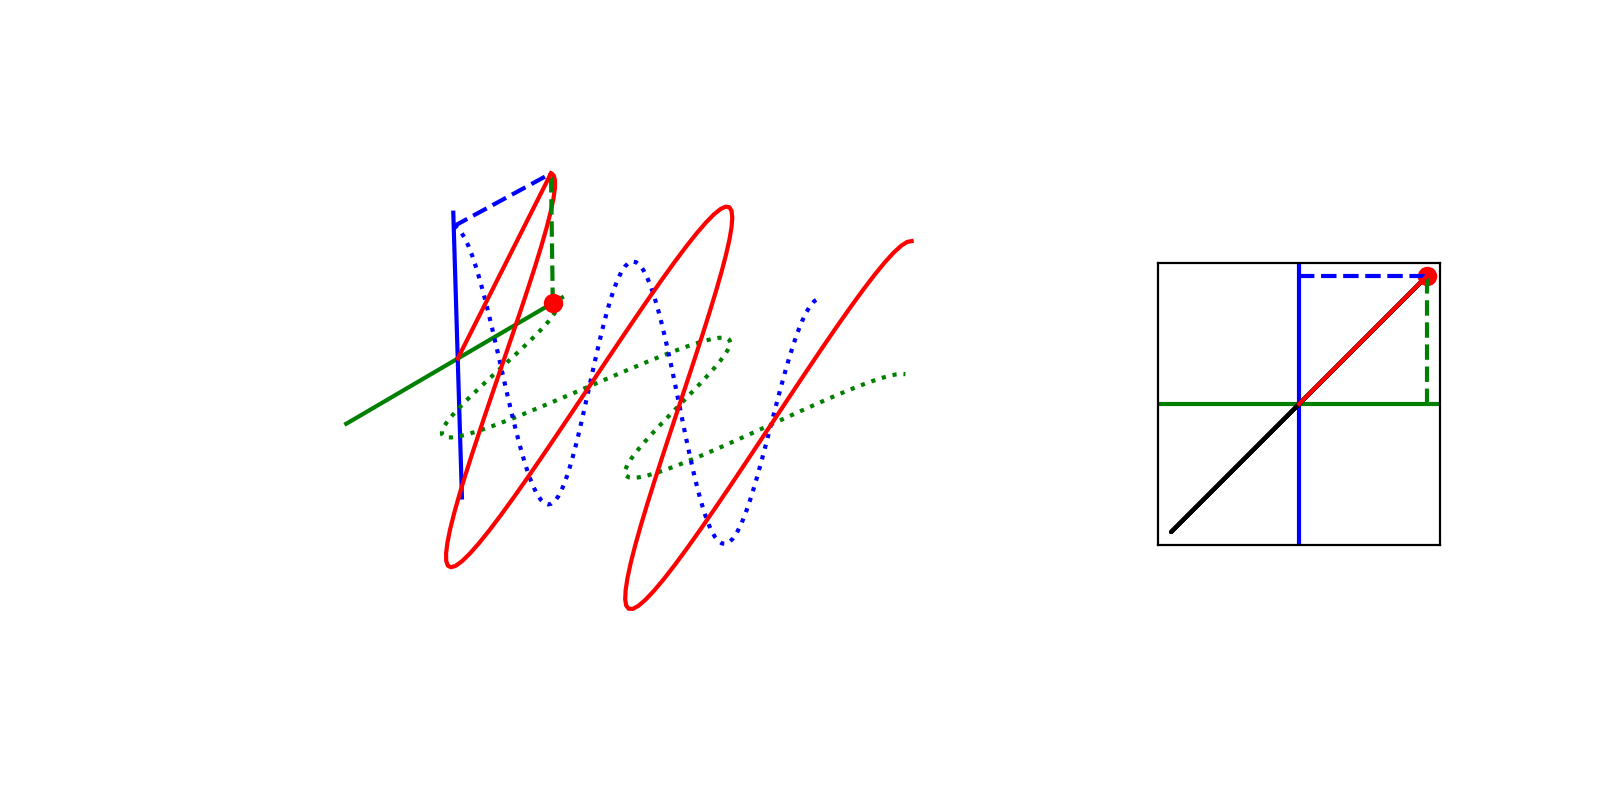

In [15]:
theta = np.radians(45)
v = mueller.stokes_linear(theta)
aplt = vis.draw_stokes_field(v)
aplt.show()

<IPython.core.display.Javascript object>


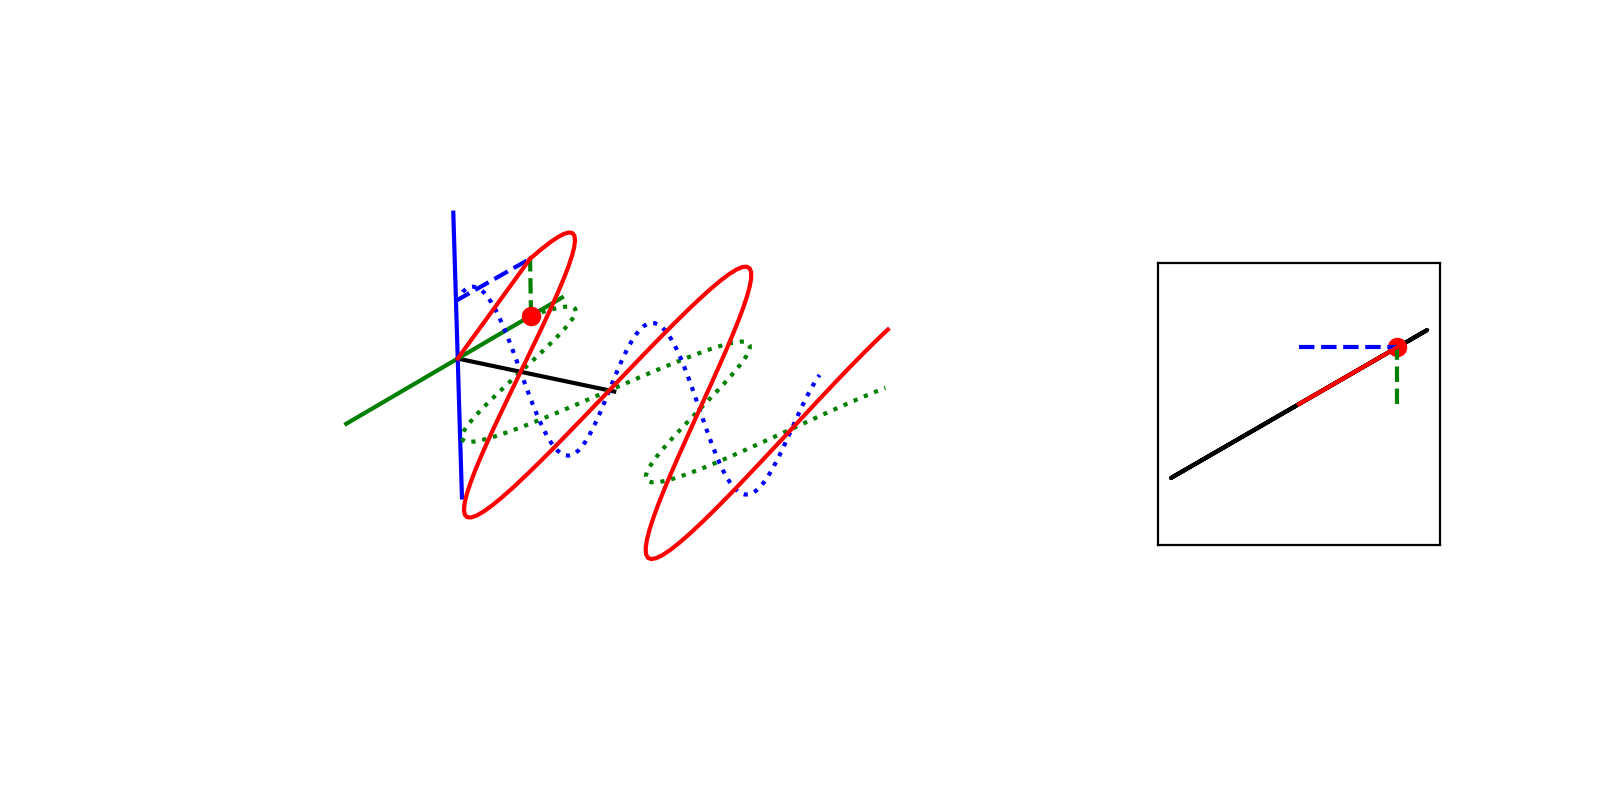

In [16]:
theta = np.radians(30)
v = jones.field_linear(theta)
vis.draw_jones_animated(v)

<IPython.core.display.Javascript object>


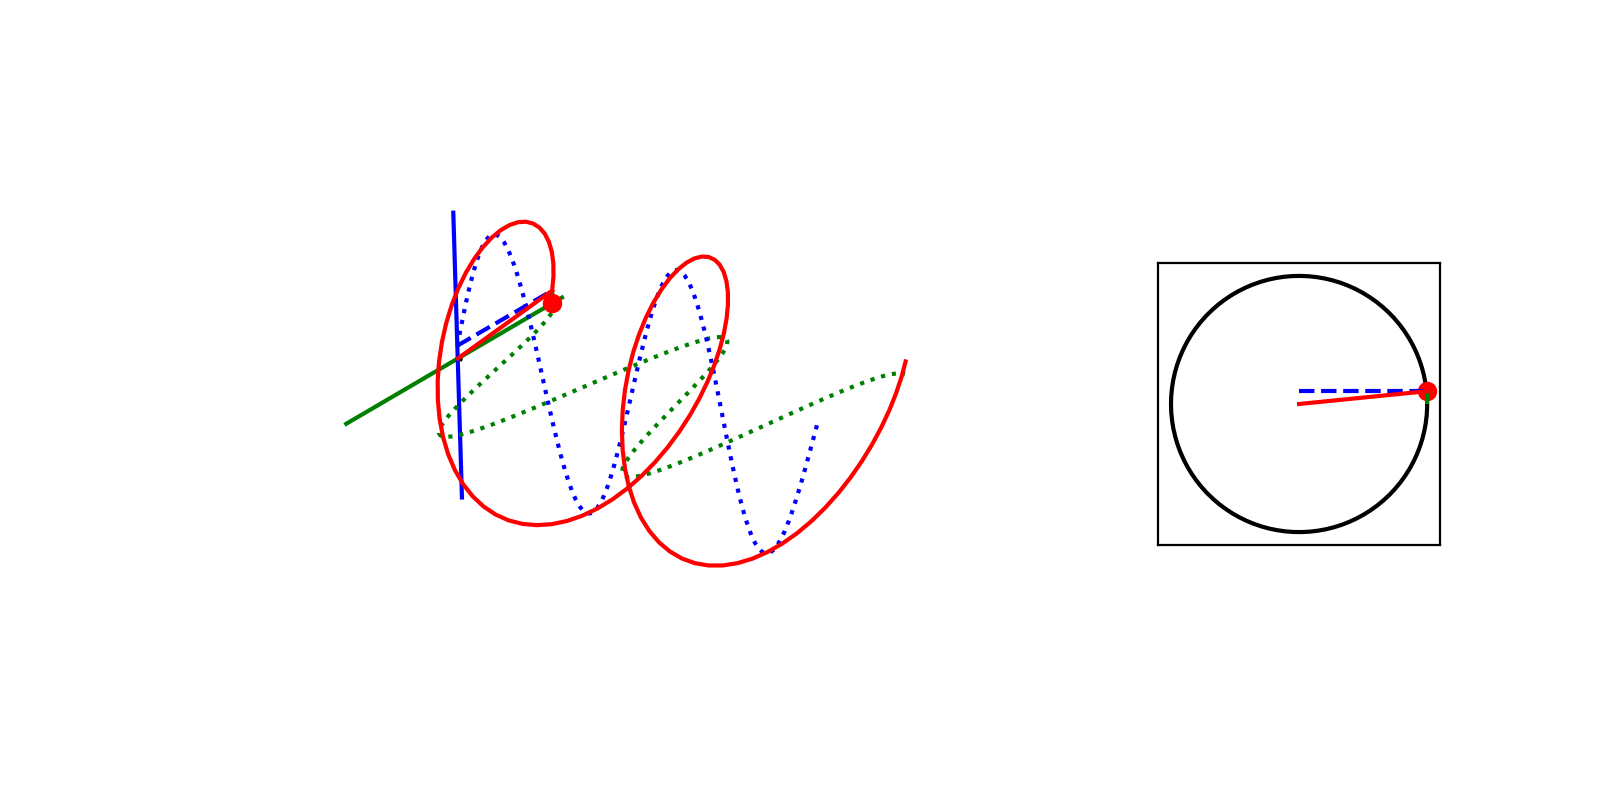

In [17]:
v = jones.field_left_circular()
vis.draw_jones_animated(v)

<IPython.core.display.Javascript object>


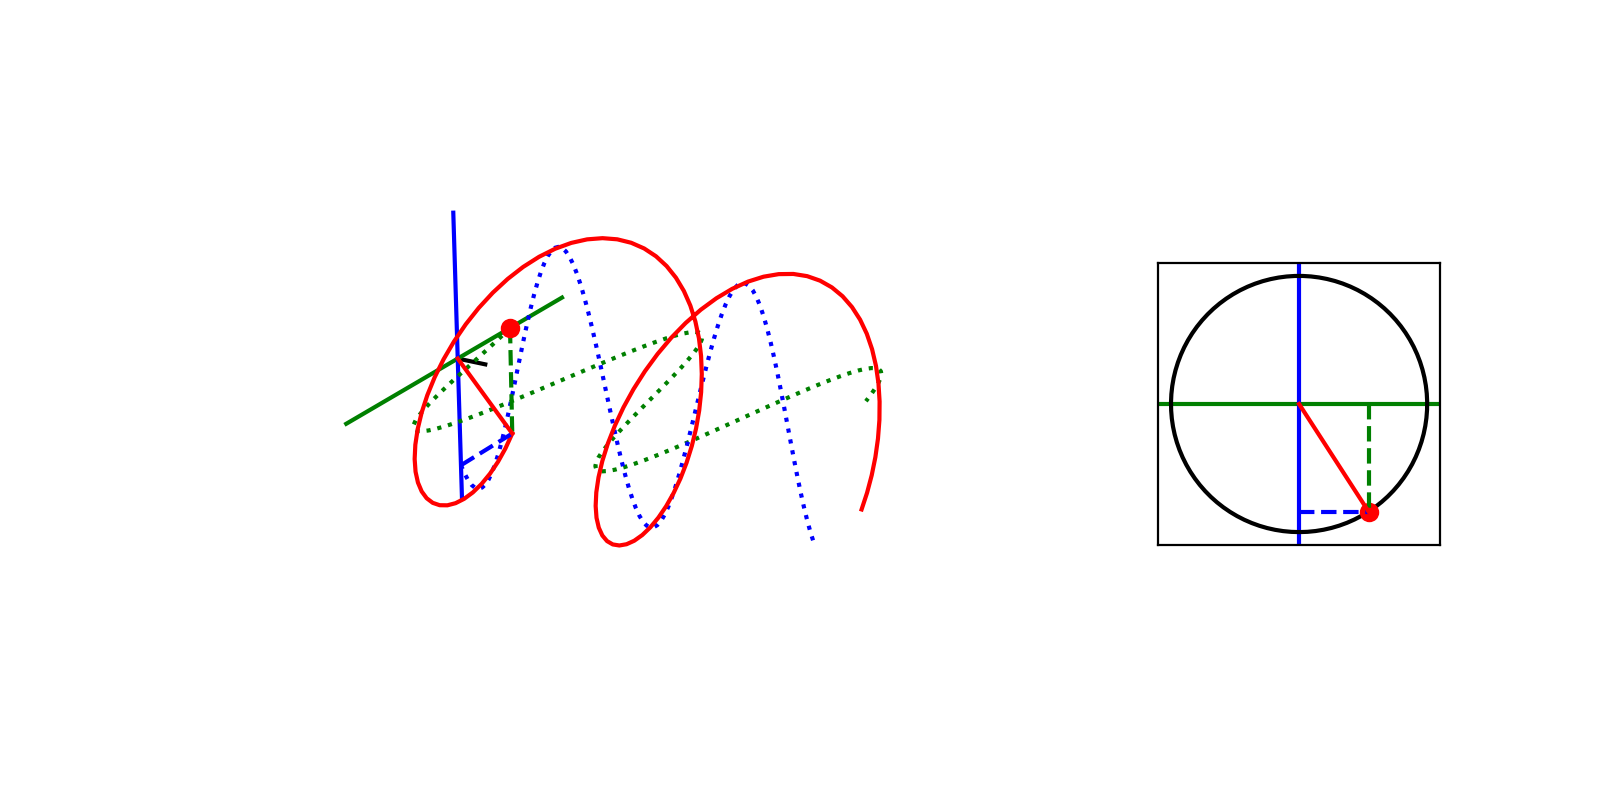

In [18]:
v=jones.field_right_circular()
vis.draw_jones_animated(v)

# Field Interpretation

In [19]:
v=jones.field_horizontal()
jones.interpret(v)

'Linear polarization at 0.000000 degrees CCW from x-axis'

In [20]:
v=jones.field_vertical()
jones.interpret(v)

'Linear polarization at 90.000000 degrees CCW from x-axis'

In [21]:
theta = np.radians(45)
v=jones.field_linear(theta)
jones.interpret(v)

'Linear polarization at 45.000000 degrees CCW from x-axis'

In [22]:
v=np.array([3*np.exp(-1j*np.pi), 3*np.exp(-1j*np.pi/3)])
jones.interpret(v)

'Left circular polarization'

In [23]:
v=np.array([1,-1j])
jones.interpret(v)

'Right circular polarization'

# Optical isolator

In [24]:
A = mueller.stokes_right_circular()       # incident light
B = mueller.op_linear_polarizer(np.pi/4)  # polarizer at 45°
C = mueller.op_quarter_wave_plate(0)      # QWP with fast axis horizontal
D = mueller.op_mirror()                   # first surface mirror
E = mueller.op_quarter_wave_plate(0)      # QWP still has fast axis horizontal
F = mueller.op_linear_polarizer(-np.pi/4) # now at -45° because travelling backwards

In [25]:
# net result is no light
F @ E @ D @ C @ B @ A

array([ 9.37349864e-34,  5.73961255e-50, -9.37349864e-34,  0.00000000e+00])